<a href="https://colab.research.google.com/github/srinivasan-06/Python_for_DataScience-/blob/main/Purchase_case_6_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Good Evening Everyone!

I hope all of you are doing great ✨
Today’s session is about a Purchase Case Study with Inferential Statistics 🛒📊

We’ll be analyzing purchase data and applying concepts like hypothesis testing to draw meaningful insights. Alongside, we’ll also implement everything in Python  so that the learning becomes clear and practical.

Let’s wait for a few more minutes ⏳ and then we’ll get started with the session.

Please be interactive throughout 🤝 and don’t hesitate to ask any questions.

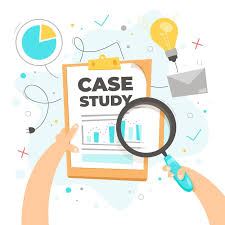

In [ ]:
#import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/purchase_data.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
263010,1004473,P00041942,M,36-45,1.0,B,3,0.0,5.0,18.0,NaN,3722.0
263011,1004473,P00115142,M,36-45,1.0,B,3,0.0,1.0,8.0,17.0,19253.0
263012,1004473,P00188442,M,36-45,1.0,B,3,0.0,5.0,7.0,NaN,3608.0
263013,1004473,P00119442,M,36-45,1.0,B,3,0.0,5.0,NaN,NaN,3604.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263015 entries, 0 to 263014
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263015 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  object 
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          181501 non-null  float64
 10  Product_Category_3          80582 non-null   float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 24.1+ MB


In [ ]:
#stats summary of the data
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,2.630150e+05,263014.000000,263014.000000,263014.000000,181501.000000,80582.000000,263014.000000
mean,1.002941e+06,8.083558,0.408685,5.291099,9.844756,12.658298,9319.305269
std,2.593126e+03,6.524052,0.491592,3.745722,5.086696,4.129156,4970.152966
min,1.000000e+01,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001457e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5863.000000
50%,1.002972e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8060.000000
75%,1.004335e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12059.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0', nan], dtype=object)

In [ ]:
df['Stay_In_Current_City_Years']= df['Stay_In_Current_City_Years'].replace("4+",4)

In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', 4, '3', '1', '0', nan], dtype=object)

In [ ]:
df['Stay_In_Current_City_Years'] = pd.to_numeric(df['Stay_In_Current_City_Years'],errors = 'coerce')

In [ ]:
df['Stay_In_Current_City_Years'].unique()

array([ 2.,  4.,  3.,  1.,  0., nan])

In [ ]:
df['Age'].value_counts()

,count
Age,
26-35,104912
36-45,52396
18-25,48193
46-50,21619
51-55,18509
55+,10321
0-17,7064


In [ ]:
#find null values

df.isnull().sum()

,0
User_ID,0
Product_ID,1
Gender,1
Age,1
Occupation,1
City_Category,1
Stay_In_Current_City_Years,1
Marital_Status,1
Product_Category_1,1
Product_Category_2,81514


In [ ]:
df.shape

(263015, 12)

In [ ]:
df['Product_Category_2'].fillna(0, inplace= True)
df['Product_Category_3'].fillna(0, inplace= True)

/tmp/ipython-input-2805760062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category_2'].fillna(0, inplace= True)
/tmp/ipython-input-2805760062.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,1
Gender,1
Age,1
Occupation,1
City_Category,1
Stay_In_Current_City_Years,1
Marital_Status,1
Product_Category_1,1
Product_Category_2,0


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263014 entries, 0 to 263013
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263014 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  float64
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          263014 non-null  float64
 10  Product_Category_3          263014 non-null  float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 26.1+ MB


In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2.0,0.0,3.0,0.0,0.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2.0,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2.0,0.0,12.0,0.0,0.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2.0,0.0,12.0,14.0,0.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4.0,0.0,8.0,0.0,0.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
263009,1004473,P00296542,M,36-45,1.0,B,3.0,0.0,8.0,0.0,0.0,8061.0
263010,1004473,P00041942,M,36-45,1.0,B,3.0,0.0,5.0,18.0,0.0,3722.0
263011,1004473,P00115142,M,36-45,1.0,B,3.0,0.0,1.0,8.0,17.0,19253.0
263012,1004473,P00188442,M,36-45,1.0,B,3.0,0.0,5.0,7.0,0.0,3608.0


In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2.0,0.0,3.0,0.0,0.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2.0,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2.0,0.0,12.0,0.0,0.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2.0,0.0,12.0,14.0,0.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4.0,0.0,8.0,0.0,0.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
263009,1004473,P00296542,M,36-45,1.0,B,3.0,0.0,8.0,0.0,0.0,8061.0
263010,1004473,P00041942,M,36-45,1.0,B,3.0,0.0,5.0,18.0,0.0,3722.0
263011,1004473,P00115142,M,36-45,1.0,B,3.0,0.0,1.0,8.0,17.0,19253.0
263012,1004473,P00188442,M,36-45,1.0,B,3.0,0.0,5.0,7.0,0.0,3608.0


In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
for i in df.columns:
  if df[i].dtype == "object":
    df[i] = le.fit_transform(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263014 entries, 0 to 263013
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263014 non-null  int64  
 1   Product_ID                  263014 non-null  int64  
 2   Gender                      263014 non-null  int64  
 3   Age                         263014 non-null  int64  
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  int64  
 6   Stay_In_Current_City_Years  263014 non-null  float64
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          263014 non-null  float64
 10  Product_Category_3          263014 non-null  float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 26.1 MB


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_mappings = {}

for i in df.columns:
    if df[i].dtype == "object":
        le = LabelEncoder()
        df[i] = le.fit_transform(df[i])
        label_mappings[i] = dict(zip(le.classes_, le.transform(le.classes_)))

for column, mapping in label_mappings.items():
    print(f"Mapping for {column}: {mapping}")


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_mappings = {}

for i in df.columns:
    if df[i].dtype == "object":
        le = LabelEncoder()
        df[i] = le.fit_transform(df[i])
        label_mappings[i] = dict(zip(le.classes_, le.transform(le.classes_)))

for column, mapping in label_mappings.items():
    print(f"Mapping for {column}: {mapping}")


In [ ]:

#stats
# - data collection
# - preparing samples
# - create - null, alt
# - choose appropriate test
# - if p-val > 0.05-- fail to reject null hypo
# - if p-val <0.05 rej the null


a. it was observed that the average purchase made by then men of the age 18-25 was 10000. is it still the same

gender - men &
age - 18-25

In [ ]:
new_df = df[(df['Age'] == 1) & df['Gender'] == 1]
new_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
97,1000021,2024,1,1,16.0,1,0.0,0.0,3.0,12.0,0.0,3055.0
98,1000022,3261,1,1,15.0,0,4.0,0.0,1.0,8.0,17.0,12099.0
99,1000022,1954,1,1,15.0,0,4.0,0.0,5.0,8.0,0.0,8797.0
100,1000022,1792,1,1,15.0,0,4.0,0.0,3.0,4.0,0.0,10681.0
101,1000022,1020,1,1,15.0,0,4.0,0.0,8.0,14.0,0.0,7801.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262767,1004446,1311,1,1,18.0,1,1.0,1.0,1.0,2.0,0.0,15431.0
262951,1004465,2880,1,1,4.0,0,1.0,1.0,5.0,0.0,0.0,1763.0
262952,1004465,1296,1,1,4.0,0,1.0,1.0,2.0,3.0,4.0,3240.0
262953,1004465,2733,1,1,4.0,0,1.0,1.0,8.0,0.0,0.0,5832.0


In [ ]:
new_df['Purchase'].mean()

np.float64(9440.512275679841)

In [ ]:
sample = new_df.sample(3600)

In [ ]:
sample

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
109832,1004916,2311,1,1,20.0,2,4.0,0.0,3.0,5.0,0.0,3118.0
82899,1000817,146,1,1,4.0,1,2.0,0.0,2.0,4.0,0.0,12784.0
50940,1001778,2509,1,1,4.0,1,1.0,0.0,5.0,0.0,0.0,3601.0
259330,1003942,983,1,1,4.0,1,4.0,0.0,8.0,17.0,0.0,9855.0
118102,1000214,665,1,1,20.0,2,1.0,0.0,3.0,5.0,16.0,13270.0
...,...,...,...,...,...,...,...,...,...,...,...,...
243181,1001470,2511,1,1,4.0,0,1.0,1.0,8.0,0.0,0.0,3994.0
110163,1004969,1996,1,1,19.0,0,2.0,0.0,1.0,2.0,11.0,8007.0
202208,1001211,1502,1,1,4.0,0,1.0,0.0,8.0,16.0,0.0,9748.0
71975,1005064,982,1,1,4.0,1,0.0,0.0,8.0,0.0,0.0,10069.0


In [ ]:
#null hypo - = mean will equal to 10000
#alt hypo - mean will be not equal to 10000

In [ ]:
#test -- ttest_1samp

from scipy.stats import ttest_1samp
a_mean = 10000

In [ ]:
t_stat,p_value = ttest_1samp(sample['Purchase'], a_mean)
print(p_value)

9.686247704870598e-11


In [ ]:
#as the p-value is less than 0.05 so mean is not equal to 10k
#reject the null hypo

In [ ]:
#is the avg purchase made by men and women of the age 18-25 are same?

In [ ]:
df_men = df.loc[(df['Gender'] ==1)  & (df['Age'] == 1)]
df_women = df.loc[(df['Gender'] ==0)  & (df['Age'] == 1)]

In [ ]:
df_men

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
97,1000021,2024,1,1,16.0,1,0.0,0.0,3.0,12.0,0.0,3055.0
98,1000022,3261,1,1,15.0,0,4.0,0.0,1.0,8.0,17.0,12099.0
99,1000022,1954,1,1,15.0,0,4.0,0.0,5.0,8.0,0.0,8797.0
100,1000022,1792,1,1,15.0,0,4.0,0.0,3.0,4.0,0.0,10681.0
101,1000022,1020,1,1,15.0,0,4.0,0.0,8.0,14.0,0.0,7801.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262767,1004446,1311,1,1,18.0,1,1.0,1.0,1.0,2.0,0.0,15431.0
262951,1004465,2880,1,1,4.0,0,1.0,1.0,5.0,0.0,0.0,1763.0
262952,1004465,1296,1,1,4.0,0,1.0,1.0,2.0,3.0,4.0,3240.0
262953,1004465,2733,1,1,4.0,0,1.0,1.0,8.0,0.0,0.0,5832.0


In [ ]:
df_women

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
70,1000018,3406,0,1,3.0,1,3.0,0.0,5.0,0.0,0.0,1780.0
71,1000018,1740,0,1,3.0,1,3.0,0.0,3.0,4.0,9.0,10754.0
72,1000018,1371,0,1,3.0,1,3.0,0.0,4.0,8.0,9.0,2802.0
73,1000018,990,0,1,3.0,1,3.0,0.0,1.0,2.0,5.0,19473.0
74,1000018,1048,0,1,3.0,1,3.0,0.0,1.0,2.0,0.0,19672.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262414,1004387,264,0,1,4.0,1,0.0,0.0,8.0,0.0,0.0,7798.0
262415,1004387,1212,0,1,4.0,1,0.0,0.0,4.0,5.0,13.0,684.0
262450,1004398,978,0,1,4.0,2,2.0,0.0,8.0,0.0,0.0,7926.0
262451,1004398,3127,0,1,4.0,2,2.0,0.0,5.0,0.0,0.0,5183.0


In [ ]:
#create samples
df_mensample = df_men.sample(1000)
df_womensample = df_women.sample(1000)

In [ ]:
print(df_mensample.Purchase.var())
print(df_womensample.Purchase.var())

26318655.97953055
22050486.002958924


In [ ]:
print(df_mensample.Purchase.mean())
print(df_womensample.Purchase.mean())

9536.357
8434.638


In [ ]:
#compute f stat

from scipy.stats import f
F = df_mensample.Purchase.mean()/df_womensample.Purchase.mean()
F

np.float64(1.1306184094681953)

In [ ]:
df1 = len(df_mensample)-1
df2 = len(df_womensample) - 1

In [ ]:
#p-val
import scipy
p_val = 1-scipy.stats.f.cdf(F,df1,df2)
p_val

np.float64(0.026249663043899307)

In [ ]:
#null - both are same
#alt - both are not same

is the percentage of men who have spenyt more than 10000 the same for the age 18-25 and 26-35?